In [2]:
import numpy as np
import xarray as xr

In [5]:
da1 = xr.open_dataset("../Da/res_end/dl_12_0.1/xa_1986010100.nc")['xa']
da2 = xr.open_dataset("../Da/res_end/dl_12_0.1/xp_1986010100.nc")['xp']

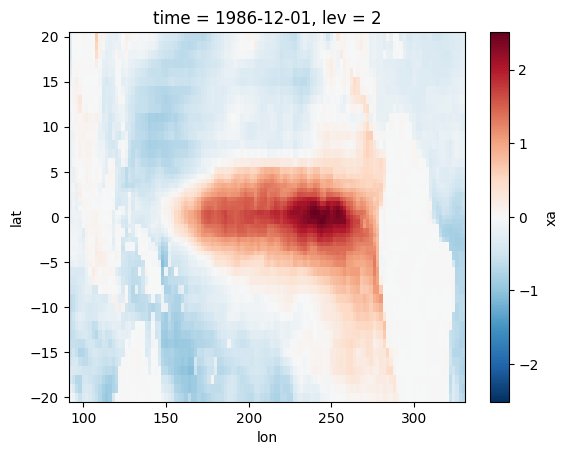

In [8]:
ssta = da1.mean('ens')[-1,2]
ssta.plot()

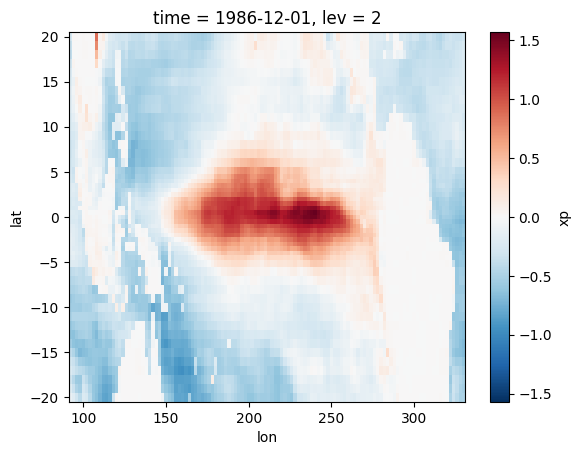

In [10]:
sstp = da2.mean('ens')[-1,2]
sstp.plot()

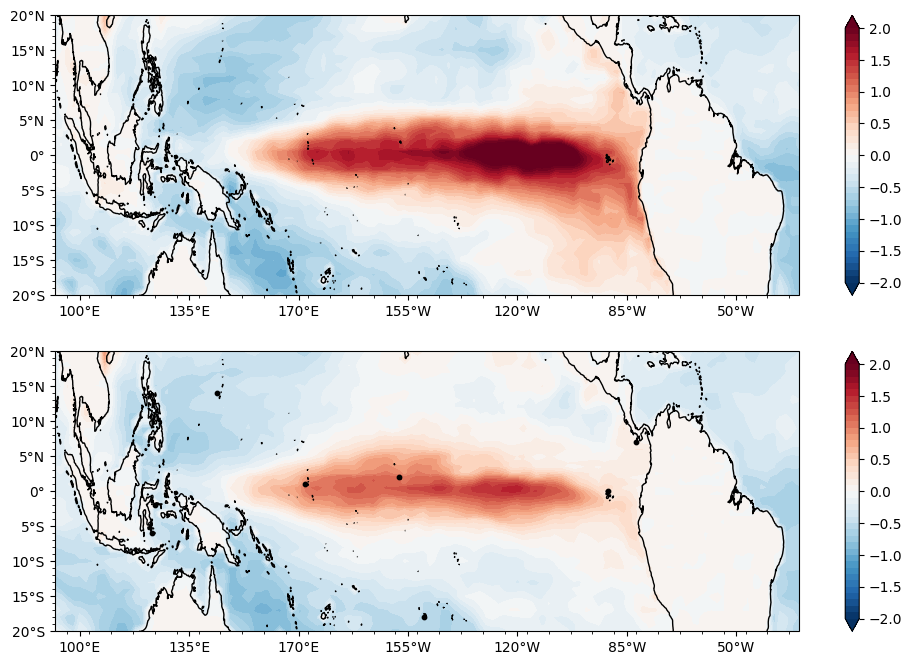

In [42]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sacpy.Map
proj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(12,8))
levels = np.arange(-2, 2.1, 0.1)
ax = fig.add_subplot(2, 1, 1, projection=proj)
m = ax.scontourf(ssta.lon, ssta.lat, ssta,levels=levels)
ax.init_map()
plt.colorbar(m, orientation='vertical')


ax1 = fig.add_subplot(2, 1, 2, projection=proj)
m = ax1.scontourf(sstp.lon, sstp.lat, sstp,levels)
ax1.init_map()
locs = np.array([[269,0],[278,7],[123,-6],[202,2],[210,-18],[172,1],[144,14],[124,-2]])

ax1.scatter(locs[:,0],locs[:,1],transform=ccrs.PlateCarree(),marker='o',color='k',s=10)

# bar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.
# fig.colorbar(m, cax=bar_ax, orientation='vertical')
plt.colorbar(m, orientation='vertical')
# plt.savefig('ssta_sstp.png',dpi=300)

In [28]:
locs.shape

(8, 2)

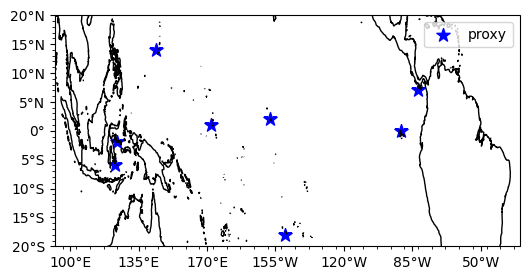

In [53]:
proj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1, 1, 1, projection=proj)
# ax.scatter(locs[:,0],locs[:,1],transform=proj)
ax.scatter(locs[:,0],locs[:,1],transform=ccrs.PlateCarree(),marker='*',color='blue',s=100,label='proxy')

ax.scontourf(ssta.lon, ssta.lat, ssta,levels=[0,1],alpha=0)
ax.init_map()
ax.legend()
plt.savefig('proxy.png',dpi=300)
# ax.init_map()

In [64]:
import pandas as pd
obs = np.load("../Da/res_end/dl_01/obs.npy") * 0.57
times = pd.date_range('1980-01-01', '2019-12-31', freq='MS')
obs.shape

(480, 8)

In [73]:
def pmean(ar, t):
    res = []
    for i in range(0,ar.shape[0],t):
        # ar[i] = ar[i] - ar[i].mean()
        res.append(ar[i:i+t].mean())
    return np.array(res)
pmean(obs[:,0],12).shape

(40,)

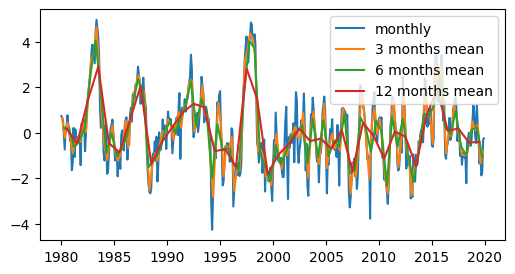

In [78]:
# ax = fig.add_subplot(1, 1, 1, projection=proj)
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1, 1, 1)
# for i in range(8):
#     ax.plot(times,obs[:,i],label='proxy'+str(i+1))
ax.plot(times,obs[:,0],label='monthly')
for i in [3,6,12]:
#     np.
    obes = pmean(obs[:,0],i)
    ax.plot(times[i//2::i],obes,label='{} months mean'.format(i))
ax.legend()
plt.savefig('proxy_mean.png',dpi=300)